## Prepare the Data 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_mice = mouse_data_complete["Mouse ID"].nunique()
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Identify the duplicate "Mouse ID" based on the subset of "Mouse ID" and"Timepoint"
duplicated_mouse_id = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()
duplicated_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

# Filtering and presenting ALL the data only for the Duplicated Mouse ID
mouse_data_duplicate = mouse_data_complete.loc[mouse_data_complete["Mouse ID"] == "g989", :]
mouse_data_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Creating a new copy of the Data Frame
mouse_data_complete_2 = mouse_data_complete[mouse_data_complete["Mouse ID"].isin(duplicated_mouse_id)==False]
mouse_data_complete_2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice_2 = len(mouse_data_complete_2["Mouse ID"].unique())
total_mice_2

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_volume_mean = mouse_data_complete_2.groupby(mouse_data_complete_2["Drug Regimen"]).mean()['Tumor Volume (mm3)']
tumor_volume_median = mouse_data_complete_2.groupby(mouse_data_complete_2["Drug Regimen"]).median()['Tumor Volume (mm3)']
tumor_volume_variance = mouse_data_complete_2.groupby(mouse_data_complete_2["Drug Regimen"]).var()['Tumor Volume (mm3)']
tumor_volume_std = mouse_data_complete_2.groupby(mouse_data_complete_2["Drug Regimen"]).std()['Tumor Volume (mm3)']
tumor_volume_sem = mouse_data_complete_2.groupby(mouse_data_complete_2["Drug Regimen"]).sem()['Tumor Volume (mm3)']

summary_df = pd.DataFrame({"Tumor Volume (Mean)":tumor_volume_mean, 
                           "Tumor Volume (Median)":tumor_volume_median, 
                           "Tumor Volume (Variance)":tumor_volume_variance, 
                           "Tumor Volume (Std. Dev.)":tumor_volume_std, 
                           "Tumor Volume (Std. Err. of the Mean)":tumor_volume_sem    
})

summary_df

,Tumor Volume (Mean),Tumor Volume (Median),Tumor Volume (Variance),Tumor Volume (Std. Dev.),Tumor Volume (Std. Err. of the Mean)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df_agg = mouse_data_complete_2.groupby(mouse_data_complete_2["Drug Regimen"])["Tumor Volume (mm3)"].agg(Mean='mean', Median='median', Variance='var', STD='std', SEM='sem')
summary_df_agg

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

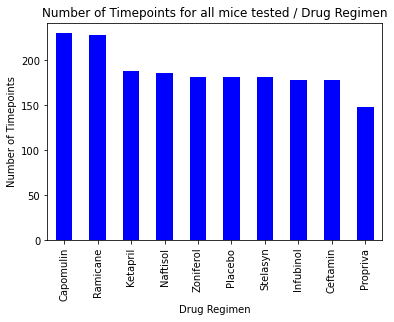

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Extracting the information for the bar plot
timepoint_count_df = mouse_data_complete_2["Drug Regimen"].value_counts()

# Creating the plot using the Pandas DataFrame.plot() method
timepoint_count_df.plot.bar(xlabel="Drug Regimen", ylabel="Number of Timepoints", title="Number of Timepoints for all mice tested / Drug Regimen", color="b")
plt.show()

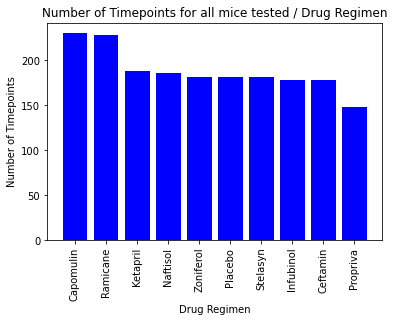

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Creating the plot using Matplotlib's pyplot methods
# x_axis assigned to the keys, and y_axis assigned to the values
plt.bar(x=timepoint_count_df.keys(), height=timepoint_count_df.values, color="b")
plt.title("Number of Timepoints for all mice tested / Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation="vertical")
plt.show()

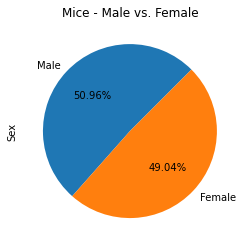

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Extracting the information for the pie plot
gender_count_df = mouse_data_complete_2["Sex"].value_counts()

# Creating the plot using the Pandas DataFrame.plot() method
gender_count_df.plot.pie(title="Mice - Male vs. Female", autopct="%1.2f%%",startangle=45)
plt.show()

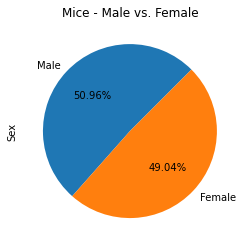

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Creating the plot using Matplotlib's pyplot methods
# x_axis assigned to the keys, and y_axis assigned to the values
plt.pie(x=gender_count_df.values, labels=gender_count_df.keys(), autopct="%1.2f%%", startangle=45)
plt.title("Mice - Male vs. Female")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Preparing the data ----- Capomulin -----

# Filtering the data based on the clean Data Frame
capomulin_last = mouse_data_complete_2.loc[mouse_data_complete_2["Drug Regimen"] == "Capomulin",:]

# Start by getting the last (greatest) timepoint for each mouse

capomulin_last = capomulin_last.groupby("Mouse ID")["Timepoint"].max()
capomulin_last = pd.DataFrame(capomulin_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

capomulin_df = pd.merge(mouse_data_complete_2, capomulin_last, how="right", on=["Mouse ID", "Timepoint"])
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,45,38.982878,2
1,b742,Capomulin,Male,7,21,45,38.939633,0
2,f966,Capomulin,Male,16,17,20,30.485985,0
3,g288,Capomulin,Male,3,19,45,37.074024,1
4,g316,Capomulin,Female,22,22,45,40.159220,2


In [14]:
# Preparing the data ----- Ramicane -----

# Filtering the data based on the clean Data Frame
ramicane_last = mouse_data_complete_2.loc[mouse_data_complete_2["Drug Regimen"] == "Ramicane",:]

# Start by getting the last (greatest) timepoint for each mouse

ramicane_last = ramicane_last.groupby("Mouse ID")["Timepoint"].max()
ramicane_last = pd.DataFrame(ramicane_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

ramicane_df = pd.merge(mouse_data_complete_2, ramicane_last, how="right", on=["Mouse ID", "Timepoint"])
ramicane_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a411,Ramicane,Male,3,22,45,38.407618,1
1,a444,Ramicane,Female,10,25,45,43.047543,0
2,a520,Ramicane,Male,13,21,45,38.810366,1
3,a644,Ramicane,Female,7,17,45,32.978522,1
4,c458,Ramicane,Female,23,20,30,38.342008,2


In [15]:
# Preparing the data ----- Infubinol -----

# Filtering the data based on the clean Data Frame
infubinol_last = mouse_data_complete_2.loc[mouse_data_complete_2["Drug Regimen"] == "Infubinol",:]

# Start by getting the last (greatest) timepoint for each mouse

infubinol_last = infubinol_last.groupby("Mouse ID")["Timepoint"].max()
infubinol_last = pd.DataFrame(infubinol_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

infubinol_df = pd.merge(mouse_data_complete_2, infubinol_last, how="right", on=["Mouse ID", "Timepoint"])
infubinol_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a577,Infubinol,Female,6,25,30,57.031862,2
3,a685,Infubinol,Male,8,30,45,66.083066,3
4,c139,Infubinol,Male,11,28,45,72.226731,2


In [16]:
# Preparing the data ----- Ceftamin -----

# Filtering the data based on the clean Data Frame
ceftamin_last = mouse_data_complete_2.loc[mouse_data_complete_2["Drug Regimen"] == "Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse

ceftamin_last = ceftamin_last.groupby("Mouse ID")["Timepoint"].max()
ceftamin_last = pd.DataFrame(ceftamin_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

ceftamin_df = pd.merge(mouse_data_complete_2, ceftamin_last, how="right", on=["Mouse ID", "Timepoint"])
ceftamin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a275,Ceftamin,Female,20,28,45,62.999356,3
1,b447,Ceftamin,Male,2,30,0,45.000000,0
2,b487,Ceftamin,Female,6,28,25,56.057749,1
3,b759,Ceftamin,Female,12,25,30,55.742829,1
4,f436,Ceftamin,Female,3,25,15,48.722078,2


In [17]:
# Creating a consolidated Data Frame to include all the data prepared in the previous steps

# Concatenating the list of the Mice and the last Timepoint for all captioned "Drug Regimen": "Capomulin", "Ramicane", "Infubinol", "Ceftamin"
consolidated_df = pd.concat([capomulin_last, ramicane_last, infubinol_last, ceftamin_last])

# Merging the data with the database
consolidated_df = pd.merge(mouse_data_complete_2, consolidated_df, how="right", on=["Mouse ID", "Timepoint"])
consolidated_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,45,38.982878,2
1,b742,Capomulin,Male,7,21,45,38.939633,0
2,f966,Capomulin,Male,16,17,20,30.485985,0
3,g288,Capomulin,Male,3,19,45,37.074024,1
4,g316,Capomulin,Female,22,22,45,40.159220,2


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# ----- Calculate the IQR and quantitatively determine if there are any potential outliers. -----

# Looping all the "Drug Regimen" in the Treatment List to get the data and calculate IQR
for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_for_treatment = consolidated_df.loc[consolidated_df["Drug Regimen"]==treatment, "Tumor Volume (mm3)"]
    
    # add subset
    tumor_vol_data.append(tumor_vol_for_treatment)    
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_for_treatment.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq-(1.5*iqr)
    upper_bound = upperq+(1.5*iqr)
    outliers = tumor_vol_for_treatment.loc[(tumor_vol_for_treatment < lower_bound) | (tumor_vol_for_treatment > upper_bound)]
    
    # Printing the calculated information for further analysis
    print(f"|---------------{treatment.upper()}----------------------|")
    print(f"Lower Quartile for {treatment} is {lowerq}.")
    print(f"Upper Quartile for {treatment} is {upperq}.")
    print(f"Inter Quartile Range for {treatment} is {iqr}.")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    if len(outliers)==0:
        print("No potential outliers in this data.")
    else:
        print("Potential outliers: " + outliers.to_string(index=False))
    print("+---------------------------------------------+")
    print("")

|---------------CAPOMULIN----------------------|
Lower Quartile for Capomulin is 32.37735684.
Upper Quartile for Capomulin is 40.1592203.
Inter Quartile Range for Capomulin is 7.781863460000004.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
No potential outliers in this data.
+---------------------------------------------+

|---------------RAMICANE----------------------|
Lower Quartile for Ramicane is 31.56046955.
Upper Quartile for Ramicane is 40.65900627.
Inter Quartile Range for Ramicane is 9.098536719999998.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
No potential outliers in this data.
+---------------------------------------------+

|---------------INFUBINOL----------------------|
Lower Quartile for Infubinol is 54.04860769.
Upper Quartile for Infubinol is 65.52574285.
Inter Quartile Range for Infubinol is 11.477135160000003.
Values below 36.83290494999999 could be outliers.
Values 

C:\Users\giova\AppData\Local\Temp\ipykernel_12756\804947598.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatment_list)


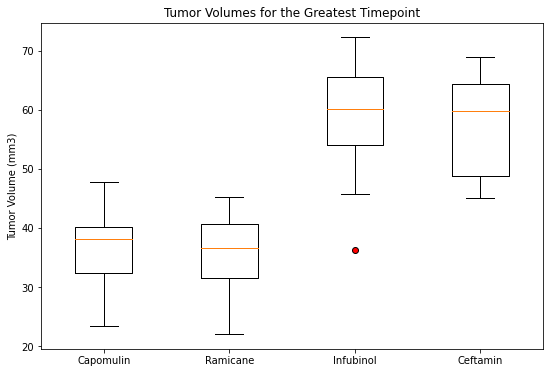

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(9,6))
ax1.set_title("Tumor Volumes for the Greatest Timepoint")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xticklabels(treatment_list)
ax1.boxplot(tumor_vol_data, flierprops=dict(markerfacecolor="red"))
plt.show()

## Line and Scatter Plots

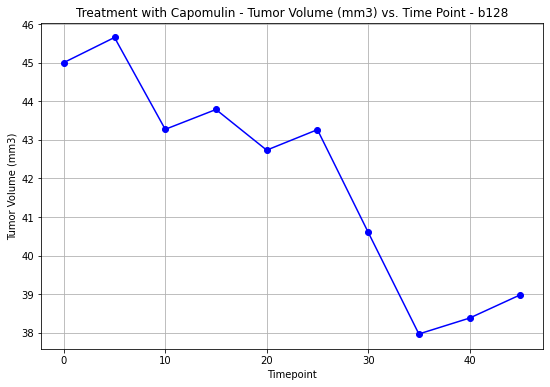

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Configuring the Mouse ID under Capomulin treatment to be processed in the plot
mouse_id = "b128"

# Getting the data for the captioned mouse treated with Capomulin
capomulin_mouse = mouse_data_complete_2.loc[mouse_data_complete_2["Mouse ID"] == mouse_id,:]
capomulin_mouse

# Plotting the data for the captioned mouse
x_axis = capomulin_mouse["Timepoint"]
y_axis = capomulin_mouse["Tumor Volume (mm3)"]

plt.subplots(figsize=(9, 6))
plt.plot(x_axis, y_axis, marker="o", color="blue")
plt.title("Treatment with Capomulin - Tumor Volume (mm3) vs. Time Point - " + mouse_id)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.show()

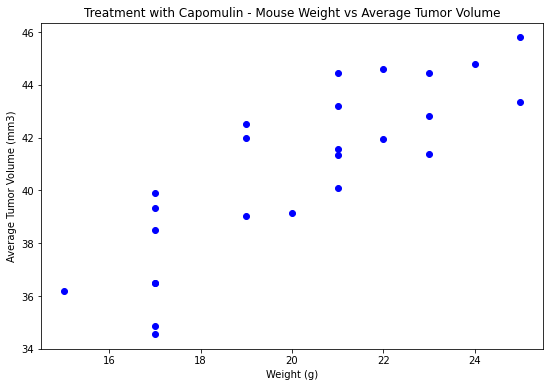

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Preparing the data and calculating the average
capomulin_df = mouse_data_complete_2.loc[mouse_data_complete_2["Drug Regimen"] == "Capomulin",:]
average_capomulin_df = capomulin_df.groupby(['Mouse ID']).mean()

x_axis = average_capomulin_df["Weight (g)"]
y_axis = average_capomulin_df["Tumor Volume (mm3)"]

# Plotting the average data for the mice treated with Capomulin

plt.subplots(figsize=(9, 6))
plt.scatter(x_axis, y_axis, color="blue")
plt.title("Treatment with Capomulin - Mouse Weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(x_axis, y_axis)[0],2)
print("The correlation between mouse weight and average tumor volume is: " + str(correlation))

The correlation between mouse weight and average tumor volume is: 0.84


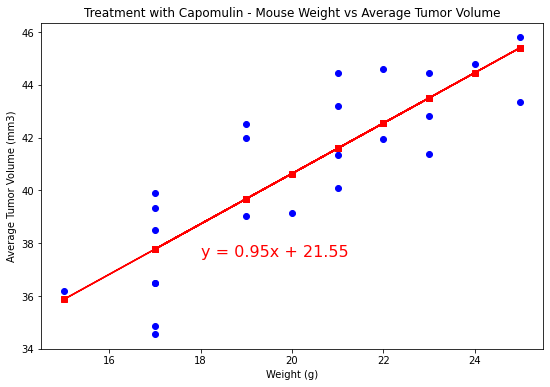

In [23]:
# Plot the linear regression model on top of the previous scatter plot.

(slope, intercept,rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plotting the average data for the mice treated with Capomulin, and the Linear Regression Model

plt.subplots(figsize=(9, 6))
plt.scatter(x_axis, y_axis, color="blue")
plt.plot(x_axis, regress_values, marker="s", color="red")
plt.title("Treatment with Capomulin - Mouse Weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.annotate(line_eq, (18,37.5), color="red", fontsize=16)

plt.show()